# Time Frequency Tradeoff in STFT

In [3]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

In [4]:
# Number of sample points
N_points = 1000

print(f'Maximum possible frequency resolution = {1/N_points}')

k = np.linspace(0, N_points-1, N_points)
k.shape

Maximum possible frequency resolution = 0.001


(1000,)

## Non Stationary Signal

Consider a signal made up of 4 sinusoids at different times

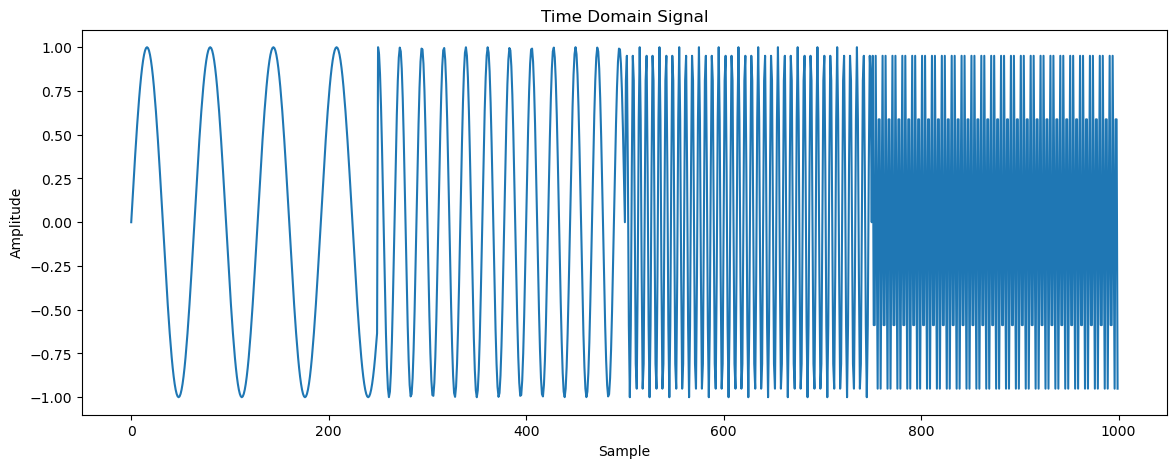

f1 = 0.015625
f2 = 0.045
f3 = 0.15
f4 = 0.3


In [18]:
# Normalized frequencies

f1 = 0.015625
f2 = 0.045
f3 = 0.15
f4 = 0.3

t1 = N_points//4
t2 = N_points//2
t3 = 3*N_points//4

x_k = 0*k
x_k[0:t1] = np.sin(2*np.pi*f1*k[0:t1])
x_k[t1:t2] = np.sin(2*np.pi*f2*k[t1:t2])
x_k[t2:t3] = np.sin(2*np.pi*f3*k[t2:t3])
x_k[t3:] = np.sin(2*np.pi*f4*k[t3:])

plt.figure(figsize=(14,5))
plt.plot(k, x_k)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Time Domain Signal")
plt.show()

print(f'f1 = {f1}')
print(f'f2 = {f2}')
print(f'f3 = {f3}')
print(f'f4 = {f4}')

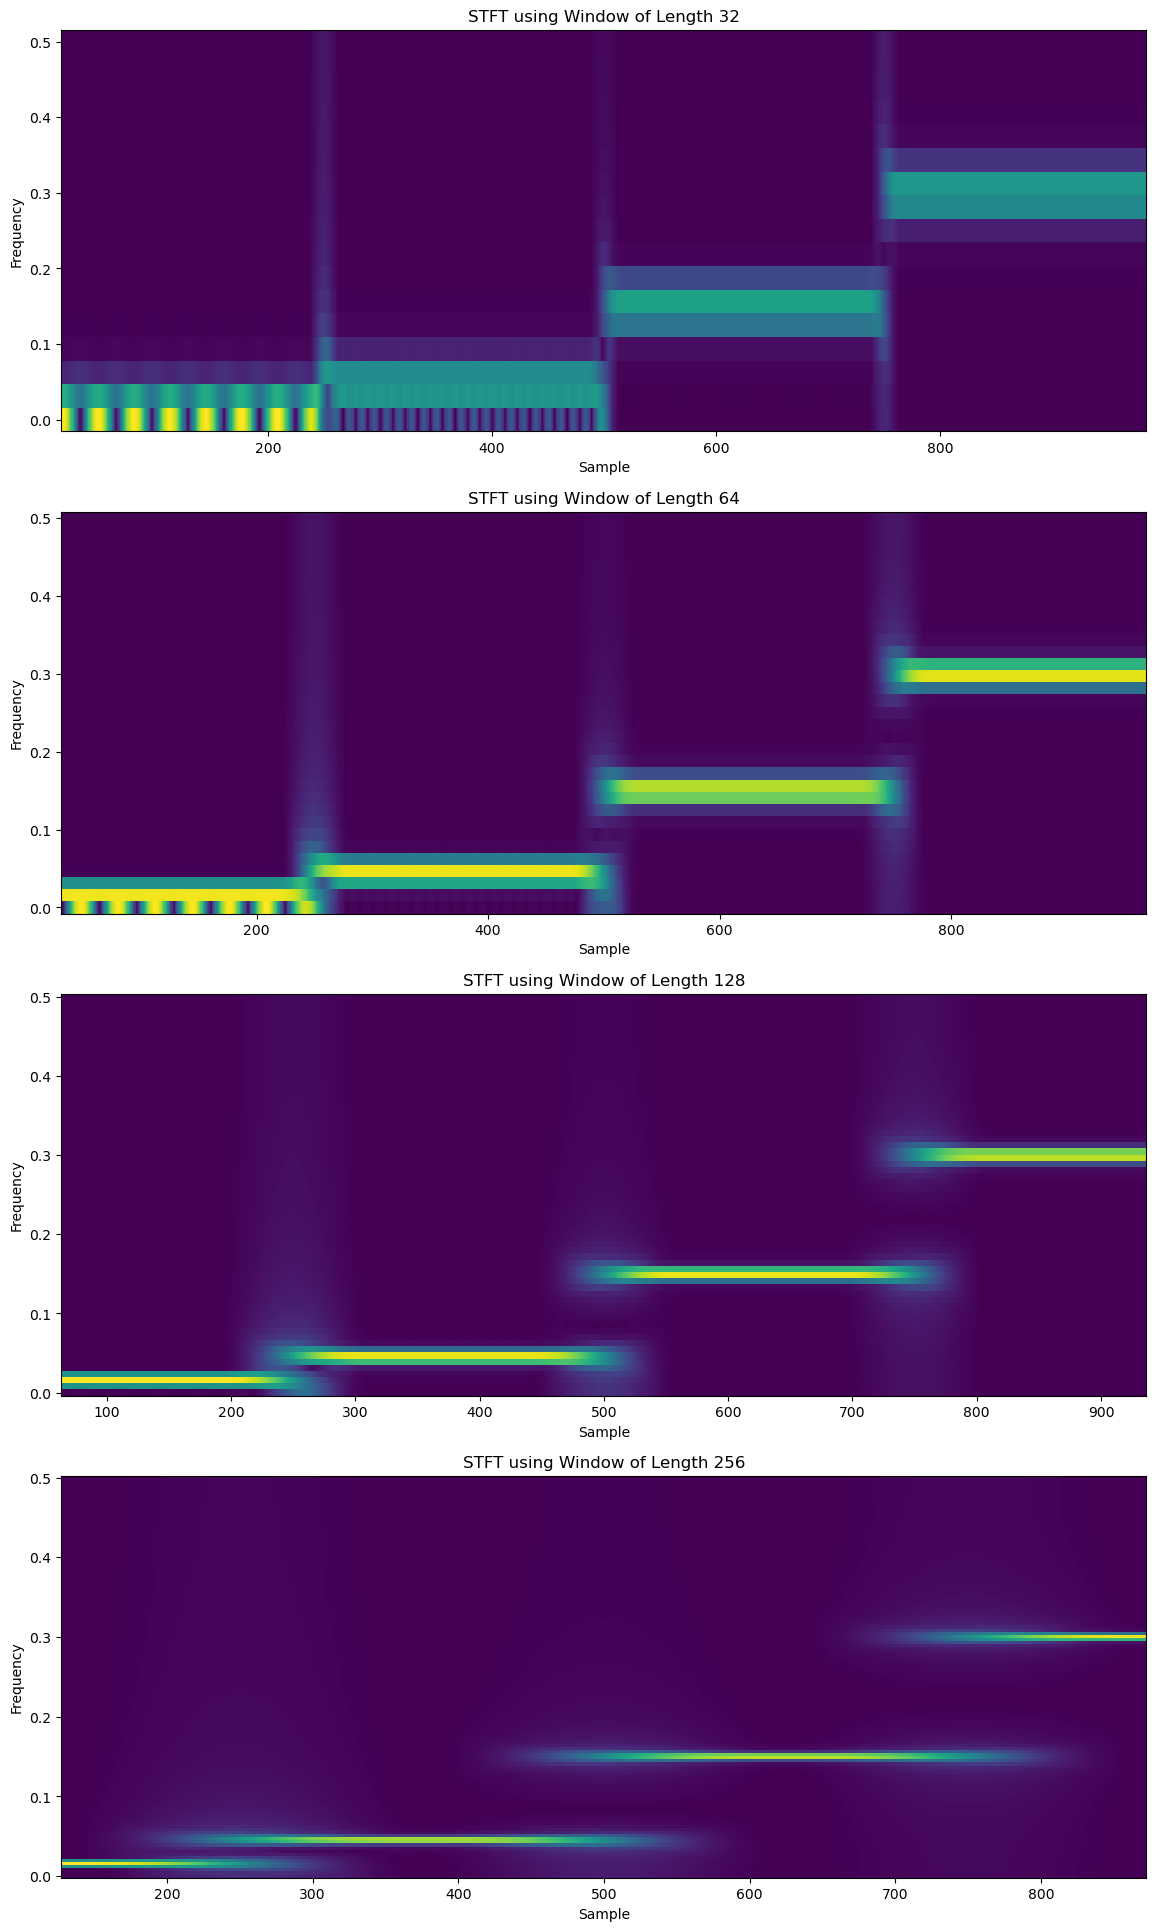

In [19]:
window_lengths = [32,64,128,256]

plt.figure(figsize=(14,6*len(window_lengths)))

for i in range(len(window_lengths)):
    window_length = window_lengths[i]
    f,t,Zxx = signal.stft(x_k,
                        window=signal.windows.hann(window_length),
                        nperseg=window_length,
                        noverlap=window_length-1, 
                        boundary=None, 
                        padded=False,  
                        scaling='spectrum')
    plt.subplot(len(window_lengths),1,i+1)
    plt.pcolormesh(t,f,np.abs(Zxx))
    plt.xlabel("Sample")
    plt.ylabel("Frequency")
    plt.title(f'STFT using Window of Length {window_length}')

Small Window ==> Better Time Resolution, Poorer Frequency Resolution

Large Window ==> Poorer Time Resolution, Better Frequency Resolution